## Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -

1.Draw plots to demonstrate the analysis for the following questions and better visualizations

2.Write code comments wherever required for code understanding

Insights to be drawn -

Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

Get all the episode names, whose average rating is more than 8 for every season

Get all the episode names that aired before May 2019

Get the episode name from each season with the highest and lowest rating

Get the summary for the most popular ( ratings ) episode in every season

​

In [1]:
#imprt necessary libraries and tools
import warnings
import numpy as np
import pandas as pd
import json
import requests
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#converting json to csv
def enter_data(dataset):
    response=requests.get(dataset)
    data=response.json()
    episodes_data = data["_embedded"]["episodes"]
    df=pd.DataFrame(episodes_data)
    df_cv=df.to_csv('episode.csv',index=False)
    return df_cv

In [3]:
enter_data('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')

In [4]:
#importing dataset
df=pd.read_csv('episode.csv')
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [5]:
df_rate=df.copy()
df_rate.isna().sum()

id          0
url         0
name        0
season      0
number      0
type        0
airdate     0
airtime     0
airstamp    0
runtime     0
rating      0
image       0
summary     0
_links      0
dtype: int64

In [6]:
#split the rate for better readable format
rr=[]
for i in df_rate['rating']:
    sp=i.split(':')
    re=sp[1]
    rating=re.split('}')
    rating=rating[0]
    rr.append(rating)
df_rate['avg_rating']=rr
df_rate['avg_rating']=df_rate['avg_rating'].astype(float)

In [7]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          36 non-null     int64  
 1   url         36 non-null     object 
 2   name        36 non-null     object 
 3   season      36 non-null     int64  
 4   number      36 non-null     int64  
 5   type        36 non-null     object 
 6   airdate     36 non-null     object 
 7   airtime     36 non-null     object 
 8   airstamp    36 non-null     object 
 9   runtime     36 non-null     int64  
 10  rating      36 non-null     object 
 11  image       36 non-null     object 
 12  summary     36 non-null     object 
 13  _links      36 non-null     object 
 14  avg_rating  36 non-null     float64
dtypes: float64(1), int64(4), object(10)
memory usage: 4.3+ KB


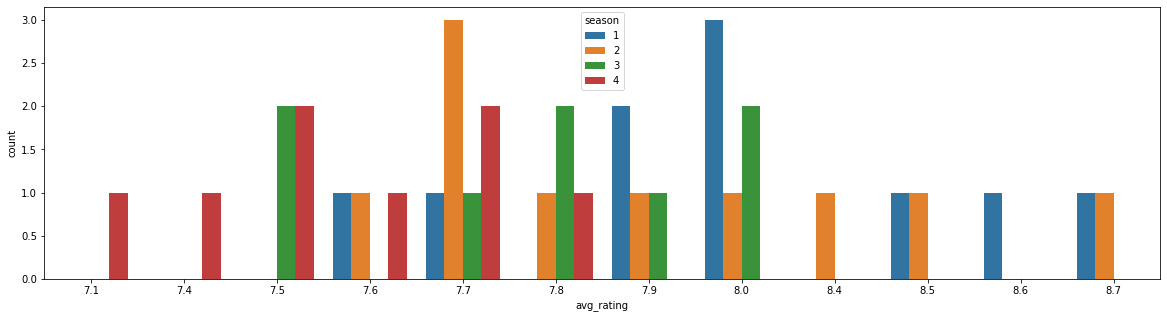

In [8]:
#plotting avg_rating vs season
axs,fig=plt.subplots(1,1,figsize=(20,5))
plt.subplot(111)
sns.countplot(data=df_rate, x= 'avg_rating', hue='season')
plt.show()

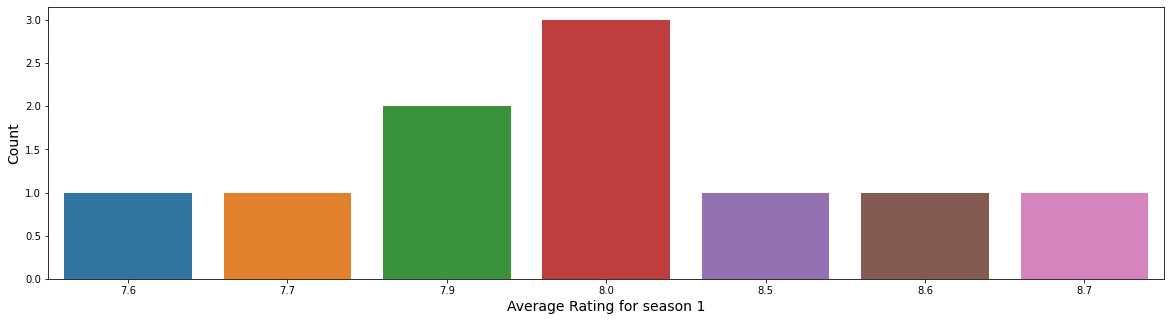

In [10]:
#for season 1
df_season1=df_rate[df_rate['season']==1]
axs,fig=plt.subplots(1,1,figsize=(20,5))
plt.subplot(111)
sns.countplot(data=df_season1, x= 'avg_rating')
plt.xlabel("Average Rating for season 1", size=14) 
plt.ylabel("Count", size=14)
plt.xticks(rotation=0)
plt.show()

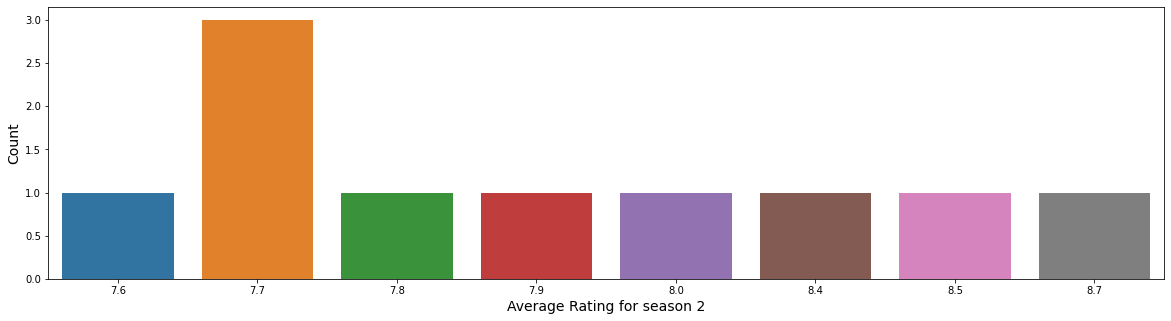

In [11]:
#for season 2
df_season2=df_rate[df_rate['season']==2]
axs,fig=plt.subplots(1,1,figsize=(20,5))
plt.subplot(111)
sns.countplot(data=df_season2, x= 'avg_rating')
plt.xlabel("Average Rating for season 2", size=14) 
plt.ylabel("Count", size=14)
plt.xticks(rotation=0)
plt.show()

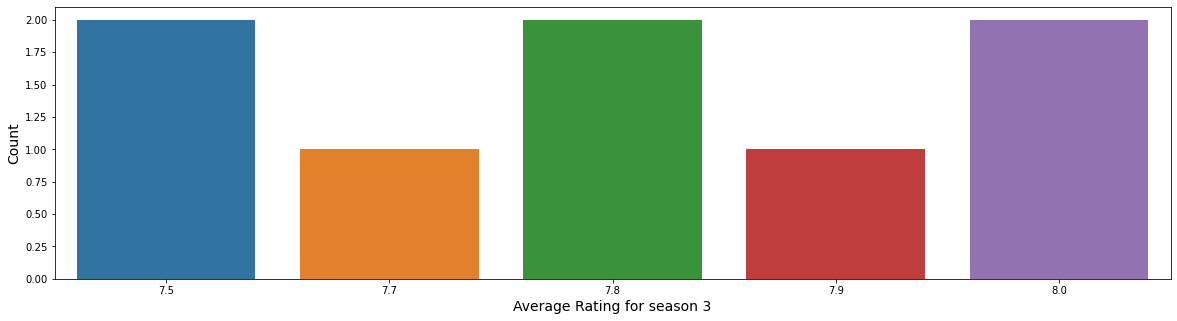

In [12]:
#for season 3
df_season3=df_rate[df_rate['season']==3]
axs,fig=plt.subplots(1,1,figsize=(20,5))
plt.subplot(111)
sns.countplot(data=df_season3, x= 'avg_rating')
plt.xlabel("Average Rating for season 3", size=14) 
plt.ylabel("Count", size=14)
plt.xticks(rotation=0)
plt.show()

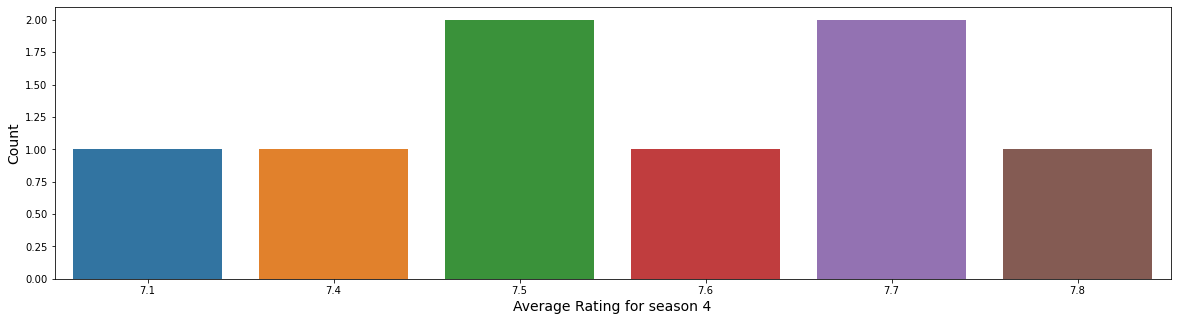

In [13]:
#for season 4
df_season4=df_rate[df_rate['season']==4]
axs,fig=plt.subplots(1,1,figsize=(20,5))
plt.subplot(111)
sns.countplot(data=df_season4, x= 'avg_rating')
plt.xlabel("Average Rating for season 4", size=14) 
plt.ylabel("Count", size=14)
plt.xticks(rotation=0)
plt.show()

In [14]:
#Get all the episode names, whose average rating is more than 8 for every season
scheduled_name=df_season1.loc[df_season1['avg_rating']>8,'name']
name1=scheduled_name.values
print(f'The episode name for all rating above 8.0 for season 1 are: {name1}')

The episode name for all rating above 8.0 for season 1 are: ["Trompe L'Oeil" 'The Well-Tempered Clavier' 'The Bicameral Mind']


In [15]:
scheduled_name=df_season2.loc[df_season2['avg_rating']>8,'name']
name2=scheduled_name.values
print(f'The episode name for all rating above 8.0 for season 2 are: {name2}')

The episode name for all rating above 8.0 for season 2 are: ['Kiksuya' 'Vanishing Point' 'The Passenger']


In [16]:
scheduled_name=df_season3.loc[df_season3['avg_rating']>8,'name']
name3=scheduled_name.values
print(f'The episode name for all rating above 8.0 for season 3 are: {name3}')

The episode name for all rating above 8.0 for season 3 are: []


In [17]:
scheduled_name=df_season4.loc[df_season4['avg_rating']>8,'name']
name4=scheduled_name.values
print(f'The episode name for all rating above 8.0 for season 4 are: {name4}')

The episode name for all rating above 8.0 for season 4 are: []


No episode is consistent for rating above 8 in all season

In [18]:
#Splitting separately for day, year, month
df_year=df.copy()
dd=[]
mm=[]
yy=[]
for i in df_year['airdate']:
    sp=i.split('-')
    day=sp[2]
    year=sp[0]
    month=sp[1]
    mm.append(month)
    dd.append(day)
    yy.append(year)
df_year['airdate_day']=dd
df_year['airdate_month']=mm
df_year['airdate_year']=yy
df_year['airdate_year']=df_year['airdate_year'].astype(int)
df_year['airdate_month']=df_year['airdate_month'].astype(int)
df_year['airdate_day']=df_year['airdate_day'].astype(int)

In [19]:
df_year['airdate_year'].value_counts()

2016    10
2018    10
2020     8
2022     8
Name: airdate_year, dtype: int64

In [20]:
#Get all the episode names that aired before May 2019
year_before=df_year.loc[df_year['airdate_year']>2019]
name=year_before['name'].values
print(name)

['Parce Domine' 'The Winter Line' 'The Absence of Field'
 'The Mother of Exiles' 'Genre' 'Decoherence' 'Passed Pawn'
 'Crisis Theory' 'The Auguries' 'Well Enough Alone' 'Années Folles'
 'Generation Loss' 'Zhuangzi' 'Fidelity' 'Metanoia' 'Que Será, Será']


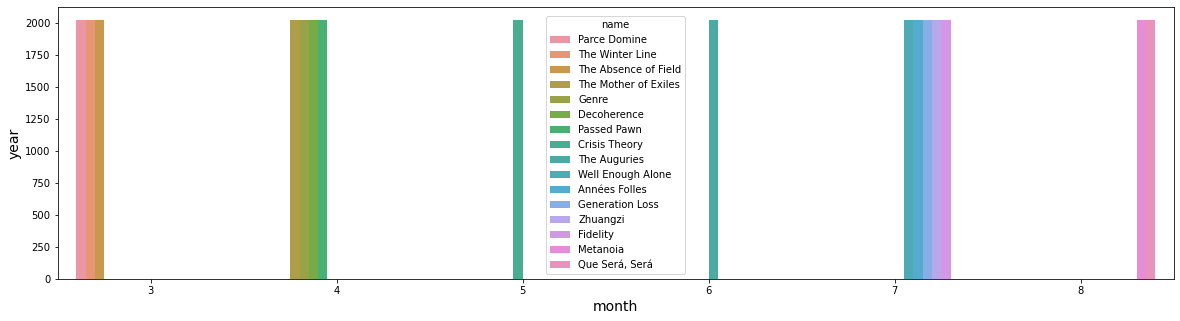

In [21]:
axs,fig=plt.subplots(1,1,figsize=(20,5))
plt.subplot(111)
sns.barplot(data=year_before, x='airdate_month',y='airdate_year', hue='name')
plt.xlabel("month", size=14) 
plt.ylabel("year", size=14)
plt.xticks(rotation=0)
plt.show()

In [22]:
#Get the episode name from each season with the highest and lowest rating
rat_value=list(df_season1['avg_rating'])
rat_value.sort()
length=len(rat_value)
highest_rating=df_season1.loc[df_season1['avg_rating']==rat_value[length-1],'name']
lowest_rating=df_season1.loc[df_season1['avg_rating']==rat_value[0],'name']
name1=highest_rating.values
name2=lowest_rating.values
print(f'The highest rating for season 1 is/are: {name1}')
print(f'The lowest rating for season 1 is/are: {name2}')

The highest rating for season 1 is/are: ['The Bicameral Mind']
The lowest rating for season 1 is/are: ['The Stray']


In [23]:
rat_value=list(df_season2['avg_rating'])
rat_value.sort()
length=len(rat_value)
highest_rating=df_season2.loc[df_season2['avg_rating']==rat_value[length-1],'name']
lowest_rating=df_season2.loc[df_season2['avg_rating']==rat_value[0],'name']
name1=highest_rating.values
name2=lowest_rating.values
print(f'The highest rating for season 2 is/are: {name1}')
print(f'The lowest rating for season 2 is/are: {name2}')

The highest rating for season 2 is/are: ['Kiksuya']
The lowest rating for season 2 is/are: ['Akane No Mai']


In [24]:
rat_value=list(df_season3['avg_rating'])
rat_value.sort()
length=len(rat_value)
highest_rating=df_season3.loc[df_season3['avg_rating']==rat_value[length-1],'name']
lowest_rating=df_season3.loc[df_season3['avg_rating']==rat_value[0],'name']
name1=highest_rating.values
name2=lowest_rating.values
print(f'The highest rating for season 3 is/are: {name1}')
print(f'The lowest rating for season 3 is/are: {name2}')

The highest rating for season 3 is/are: ['Parce Domine' 'The Mother of Exiles']
The lowest rating for season 3 is/are: ['Decoherence' 'Passed Pawn']


In [25]:
rat_value=list(df_season4['avg_rating'])
rat_value.sort()
length=len(rat_value)
highest_rating=df_season4.loc[df_season4['avg_rating']==rat_value[length-1],'name']
lowest_rating=df_season4.loc[df_season4['avg_rating']==rat_value[0],'name']
name1=highest_rating.values
name2=lowest_rating.values
print(f'The highest rating for season 4 is/are: {name1}')
print(f'The lowest rating for season 4 is/are: {name2}')

The highest rating for season 4 is/are: ['Zhuangzi']
The lowest rating for season 4 is/are: ['The Auguries']


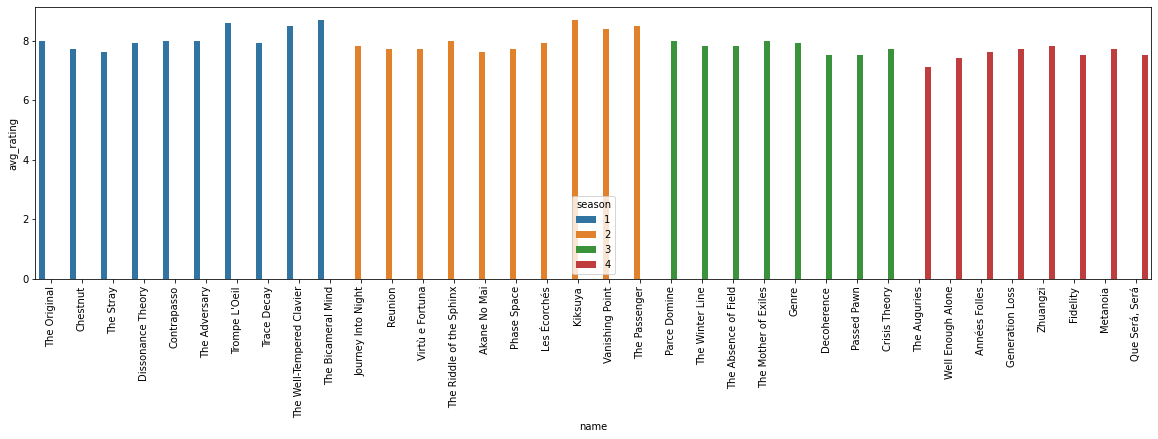

In [26]:
axs,fig=plt.subplots(1,1,figsize=(20,5))
plt.subplot(111)
sns.barplot(data=df_rate, y= 'avg_rating', x='name',hue='season')
plt.xticks(rotation=90)
plt.show()

## The rating of all movies are above 7.0. The most popular episode was screened on season 1 and season 2 with average rating above 8.0.
The popular movies from season 1 are:'Trompe LÓell','The Well-Tempered Claiver' and 'The Bicameral Mind'.

The popular episodes from season 2 are: 'Kaksuya','Vanishing Point' and 'The passenger'